In [1]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
import PIL.Image

In [4]:
import os
os.chdir('../../stylegan2-ada-pytorch')

### Load Model

In [7]:
# Load model architecture
with open('../Models/StyleGAN2-Ada/metfaces.pkl', 'rb') as f:
    architecture = pickle.load(f)
    G = architecture['G_ema'].to('mps')  # torch.nn.Module 
    D = architecture['D'].to('mps')

### Generate From Random Noise

In [9]:
z = torch.randn([1, G.z_dim]).to('mps')    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c) 

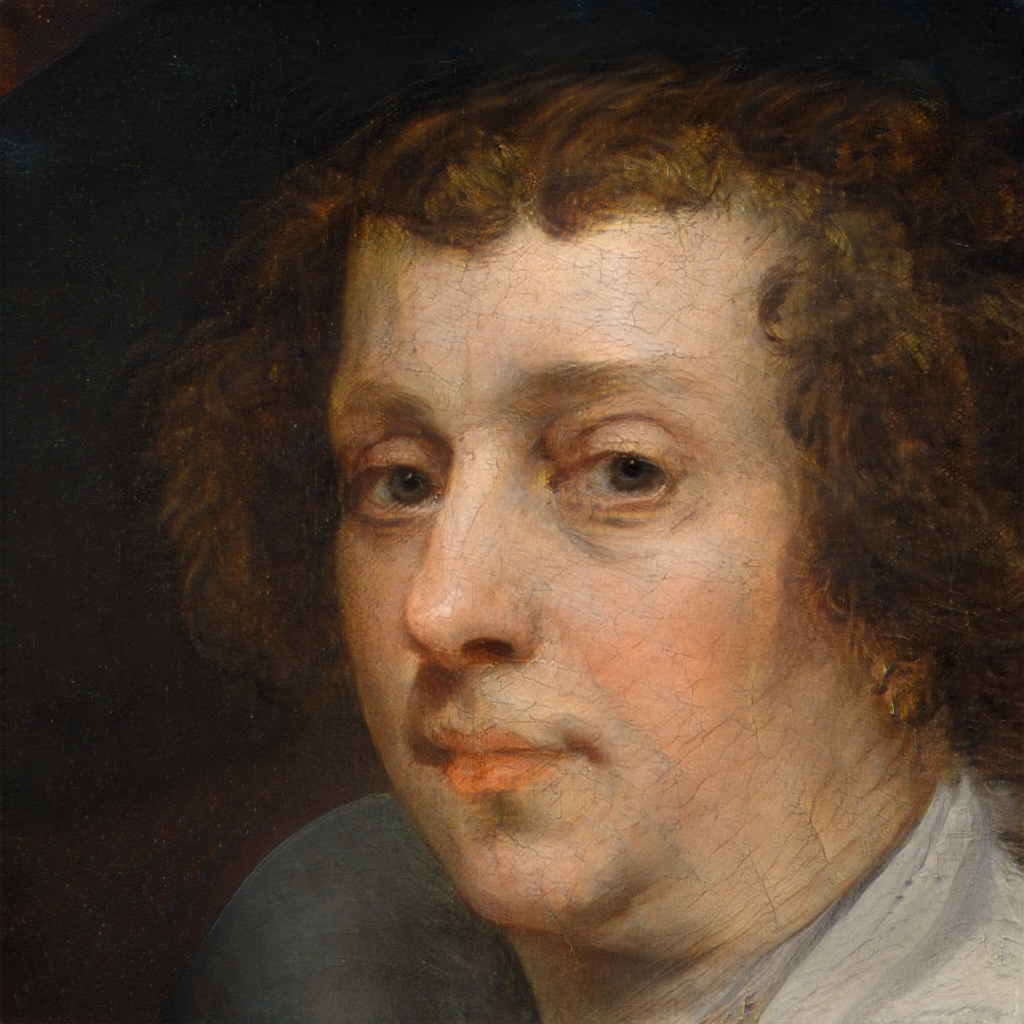

In [10]:
img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB')

### Generate from Intermediate w space

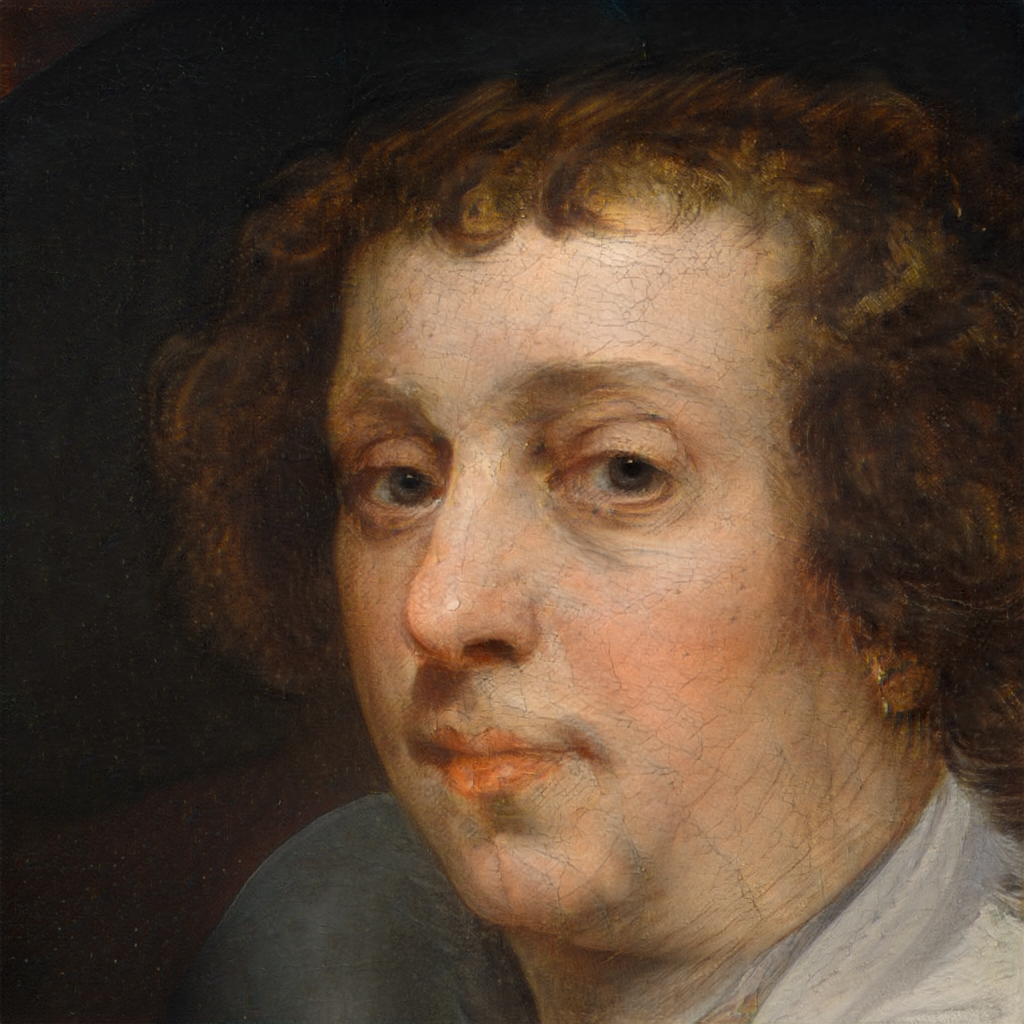

In [11]:
w = G.mapping(z, c)

img = G.synthesis(w)
img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB')

### Manipulate Intermediate w space

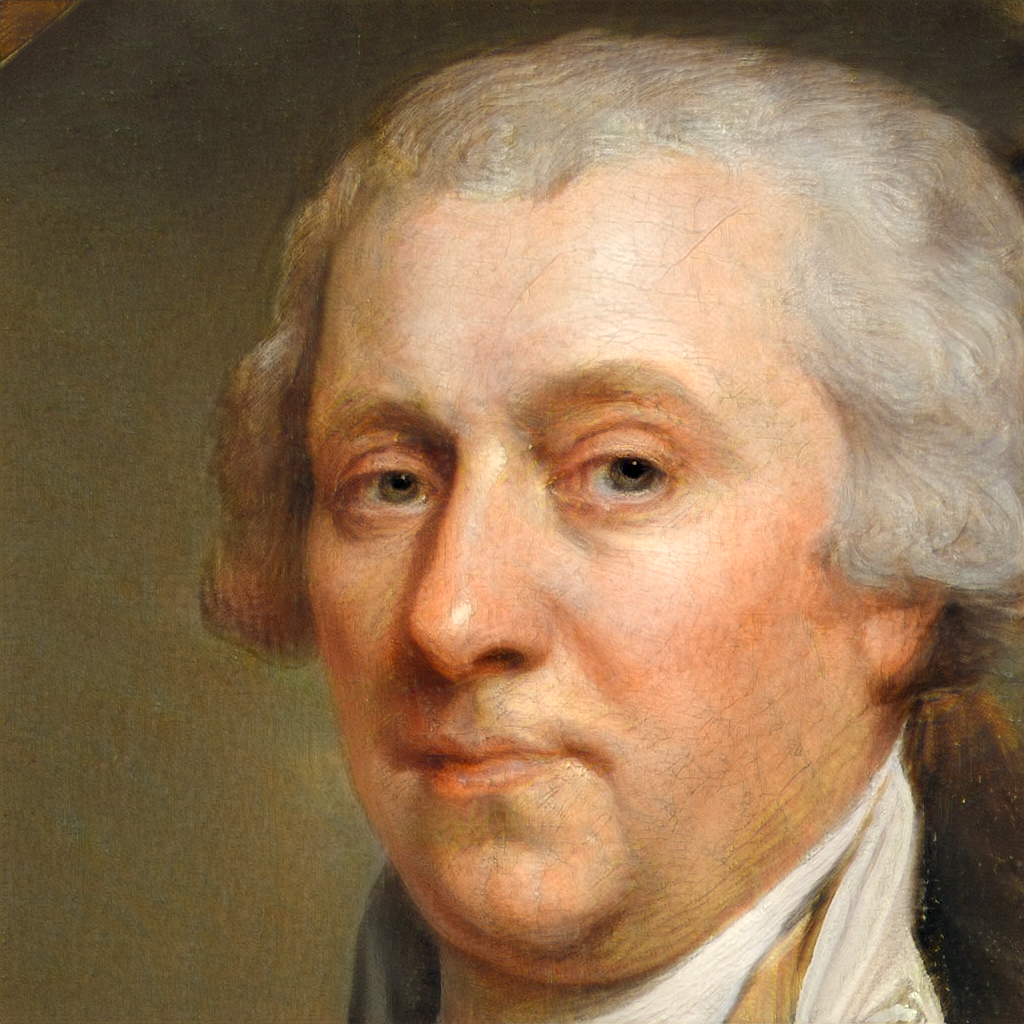

In [12]:
w = G.mapping(z, c)
w = w + 0.5 * G.mapping(torch.randn_like(z), c)

img = G.synthesis(w)
img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB')
